# Step 1: Import necessary libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
pl.Config.set_fmt_str_lengths(40)
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.subplots import make_subplots





# Step 2: Load the dataset

In [2]:

data = pd.read_csv("/kaggle/input/accident-csv/US_Accidents_March23.csv")

# Read only 100000 rows becuase i have memoryy issue

In [3]:
data=data[0:100000]

In [4]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     100000 non-null  object        
 1   source                 100000 non-null  object        
 2   severity               100000 non-null  int64         
 3   start_time             100000 non-null  datetime64[ns]
 4   end_time               100000 non-null  datetime64[ns]
 5   start_lat              100000 non-null  float64       
 6   start_lng              100000 non-null  float64       
 7   end_lat                0 non-null       float64       
 8   end_lng                0 non-null       float64       
 9   distance(mi)           100000 non-null  float64       
 10  description            100000 non-null  object        
 11  street                 100000 non-null  object        
 12  city                   99999 non-null   objec

In [18]:
data.isna().sum().sort_values(ascending=False) * 100. / len(data)

end_lat                  100.000
end_lng                  100.000
wind_chill(f)             95.678
precipitation(in)         92.632
wind_speed(mph)           23.820
humidity(%)                1.856
visibility(mi)             1.846
weather_condition          1.604
temperature(f)             1.591
pressure(in)               1.292
wind_direction             1.064
weather_timestamp          1.054
zipcode                    0.007
airport_code               0.007
timezone                   0.007
nautical_twilight          0.001
astronomical_twilight      0.001
city                       0.001
sunrise_sunset             0.001
civil_twilight             0.001
roundabout                 0.000
railway                    0.000
station                    0.000
stop                       0.000
junction                   0.000
traffic_calming            0.000
traffic_signal             0.000
turning_loop               0.000
year                       0.000
month                      0.000
week      

<Axes: >

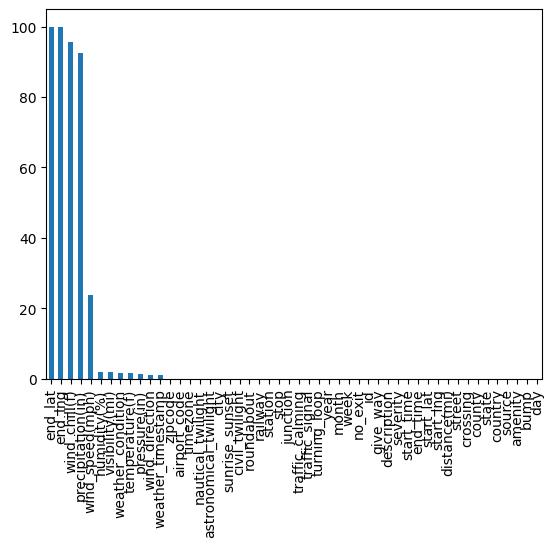

In [23]:
import pandas 
# Plotting a Pandas.Series data
missing_data = data.isna().sum().sort_values(ascending=False) * 100. / len(data)
type(missing_data) # we can directly plot the Pandas.Series using plot()
pandas.core.series.Series
missing_data.plot(kind='bar')

<Axes: >

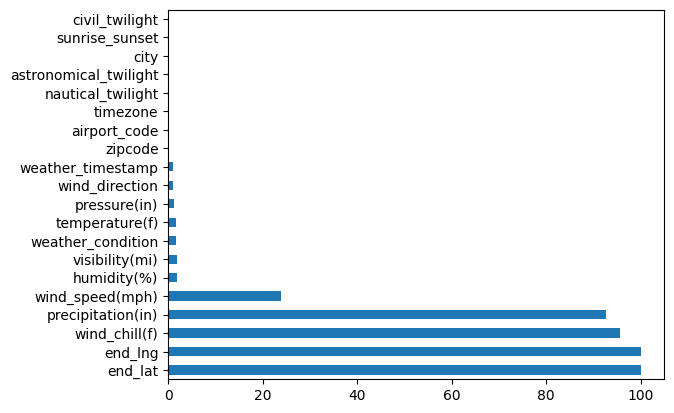

In [24]:
missing_data[missing_data!=0].plot(kind='barh')



In [27]:
data.city.unique()


array(['Dayton', 'Reynoldsburg', 'Williamsburg', 'Westerville',
       'Columbus', 'Miamisburg', 'Johnstown', 'Dublin',
       'Canal Winchester', 'Lebanon', 'Sabina', 'Goshen', 'Waynesville',
       'Springboro', 'Carroll', 'Oregonia', 'Independence',
       'Maple Heights', 'Grove City', 'Findlay', 'Fairborn', 'Piqua',
       'New Richmond', 'Batavia', 'Galena', 'Barberton', 'Akron',
       'Mansfield', 'Cleveland', 'Bethel', 'Pataskala', 'Seville',
       'Bellville', 'Troy', 'Wilmington', 'North Olmsted', 'Groveport',
       'Orient', 'Tiro', 'Strongsville', 'Beavercreek', 'Circleville',
       'Peebles', 'Hurricane', 'Xenia', 'Elyria', 'Pickerington',
       'Burbank', 'Zanesville', 'North Baltimore', 'Mount Sterling',
       'Tipp City', 'Moraine', 'Hilliard', 'Bowling Green', 'Maineville',
       'Vermilion', 'Milford', 'Brookpark', 'Fraziers Bottom',
       'Cambridge', 'Delaware', 'Moscow', 'Oberlin', 'Sardinia',
       'Lewis Center', 'Urbancrest', 'Brecksville', 'Frankfort',

In [28]:
cities = data.city.unique()
len(cities)

786

# Getting the number of accidents in each city over all years (2016-2020)

In [29]:
cities_by_accident = data.city.value_counts()
cities_by_accident[:20]

city
Los Angeles       9792
Sacramento        5223
San Diego         3275
San Jose          3026
Oakland           1802
Long Beach        1343
San Francisco     1287
Riverside         1261
Corona            1095
Whittier          1019
Anaheim            952
San Bernardino     952
Hayward            934
Stockton           886
Fremont            770
Tracy              753
Ontario            749
Santa Rosa         745
Baldwin Park       744
Livermore          685
Name: count, dtype: int64

In [33]:
'Livermore' in cities

True

In [34]:
cities_by_accident["Livermore"]

685

<Axes: ylabel='city'>

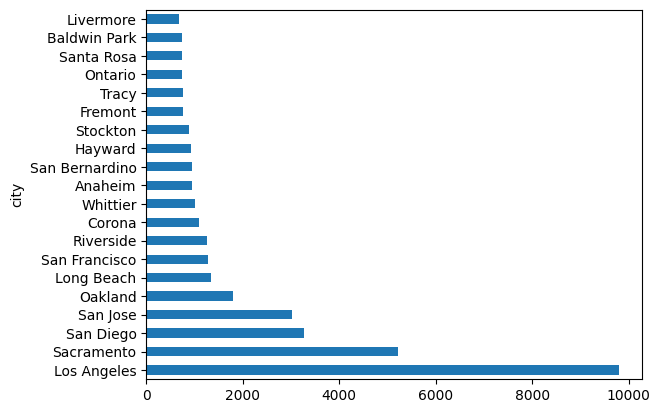

In [35]:
cities_by_accident[:20].plot(kind='barh')

/tmp/ipykernel_33/3088627074.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

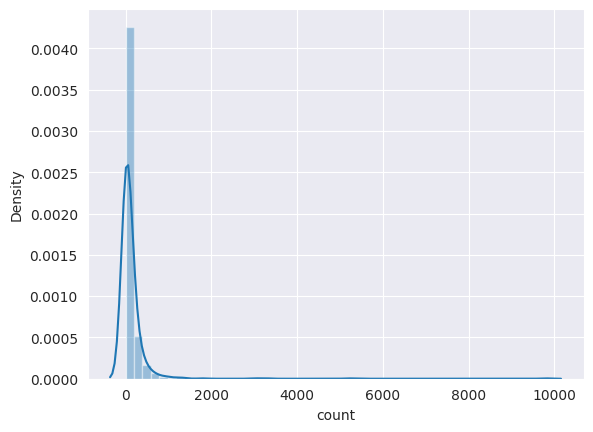

In [36]:
import seaborn as sns
sns.set_style("darkgrid")
#Plotting all the citis by number of accidents accidents

sns.distplot(cities_by_accident)

# Percentage of high accident cities

In [37]:
high_accident_cities = cities_by_accident[cities_by_accident >=1000] # having over 1000 accidents
low_accident_cities = cities_by_accident[cities_by_accident < 1000]  # having less than 1000 accidents
# Percentage of high accident cities
len(high_accident_cities) / len(cities_by_accident)

0.012738853503184714

/tmp/ipykernel_33/1927193851.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

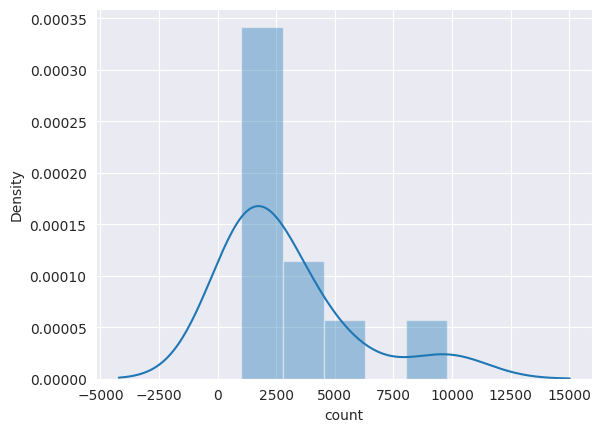

In [38]:
# Distribution of high accident cities
sns.distplot(high_accident_cities)

/tmp/ipykernel_33/2555387212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

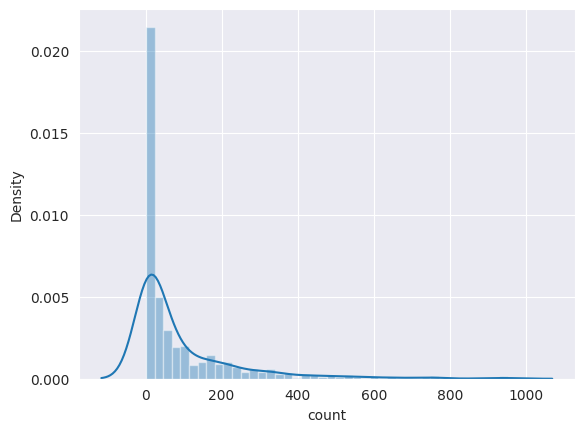

In [39]:
# Distribution of low accident cities
sns.distplot(low_accident_cities)